In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
input_path = os.path.join('..', 'data')
validation_path = os.path.join(input_path, '04_validation')

In [16]:
lstm_train_info = pd.read_csv(os.path.join(validation_path, 'lstm', 'lstm_model_history.csv'))
lstm_train_info.set_index('epoch', inplace=True)
lstm_train_info.rename(columns={'loss': 'train_loss'}, inplace=True)

[Text(0.5, 1.0, 'Loss por época - Modelo LSTM')]

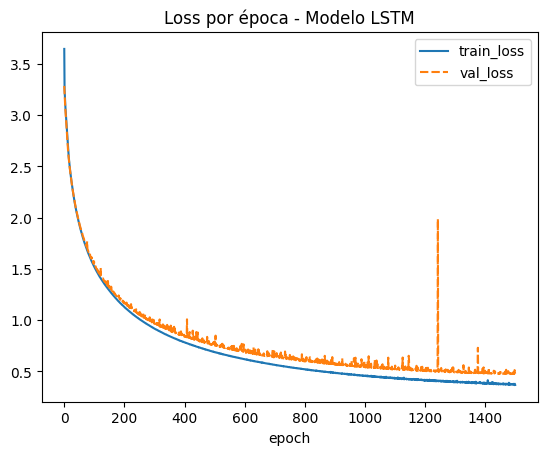

In [17]:
sns.lineplot(lstm_train_info[:1500]).set(title='Loss por época - Modelo LSTM')


In [4]:
rnn_test_info = pd.read_csv(os.path.join(validation_path, 'rnn', 'test_losses_rnn.csv'))
rnn_train_info = pd.read_csv(os.path.join(validation_path, 'rnn', 'train_losses_rnn.csv'))


In [5]:
rnn_train_info['loss_type'] = 'train_loss'
rnn_test_info['loss_type'] = 'val_loss'
rnn_train_info = pd.concat([rnn_test_info, rnn_train_info])

In [6]:
rnn_train_info.reset_index(inplace=True)
rnn_train_info.rename(columns={'index': 'epoch', '0': 'loss'}, inplace=True)

In [14]:
rnn_train_info = rnn_train_info[rnn_train_info.epoch < 50]

[Text(0.5, 1.0, 'Loss por época - Modelo RNN')]

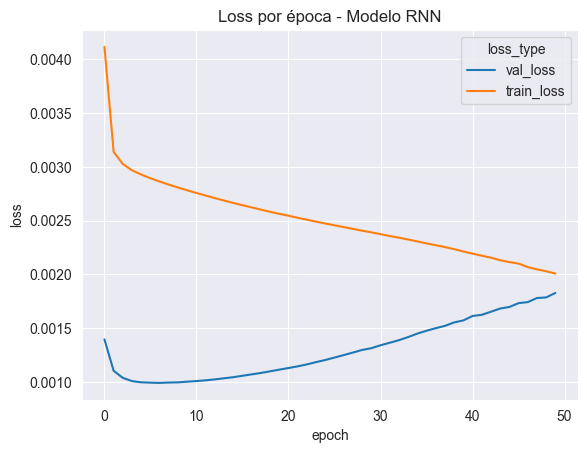

In [15]:

sns.lineplot(rnn_train_info, x='epoch', y='loss', hue='loss_type').set(title='Loss por época - Modelo RNN')


In [121]:
def read_loss_gan(filename):
    f = open(os.path.join(validation_path, 'gan', filename), 'r')
    line = f.readline()
    line = line.replace('][', ', ')
    splitted = line.split(', ')
    splitted[0] = splitted[0].removeprefix('[')
    splitted[-1] =splitted[-1].removesuffix(']')
    return pd.DataFrame(splitted).astype(float)

disc_loss = read_loss_gan('wasserloss_gan_all_tracks_disc_loss.txt')
gen_loss = read_loss_gan('wasserloss_gan_all_tracks_gen_loss.txt')


In [122]:
disc_loss['loss_type'] = 'Discriminator'
gen_loss['loss_type'] = 'Generator'

disc_loss = disc_loss.iloc[list(range(0, disc_loss.shape[0], 4200))]
disc_loss.reset_index(inplace=True, drop=True)
gen_loss = gen_loss.iloc[list(range(0, gen_loss.shape[0], 4200))]
gen_loss.reset_index(inplace=True, drop=True)

In [124]:
gan_loss_info = pd.concat([disc_loss, gen_loss])
gan_loss_info.reset_index(inplace=True)
gan_loss_info.rename(columns={'index': 'epoch', 0: 'loss'}, inplace=True)

[Text(0.5, 1.0, 'Loss por época - Modelo GAN')]

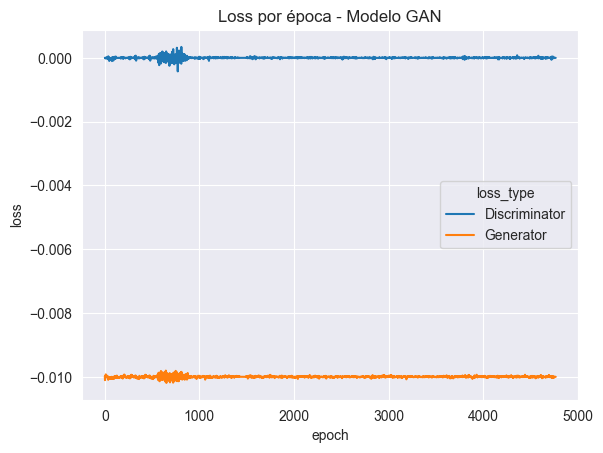

In [130]:

sns.lineplot(gan_loss_info[1:], x='epoch', y='loss', hue='loss_type').set(title='Loss por época - Modelo GAN')
